In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('/content/air quality data (1).csv')

In [5]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
df.shape

(29531, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [9]:
df.duplicated().sum()

0

In [10]:
df1=df.dropna(subset=['AQI'],inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [12]:
df.shape

(24850, 16)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [14]:
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [15]:
null_values_percentage

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


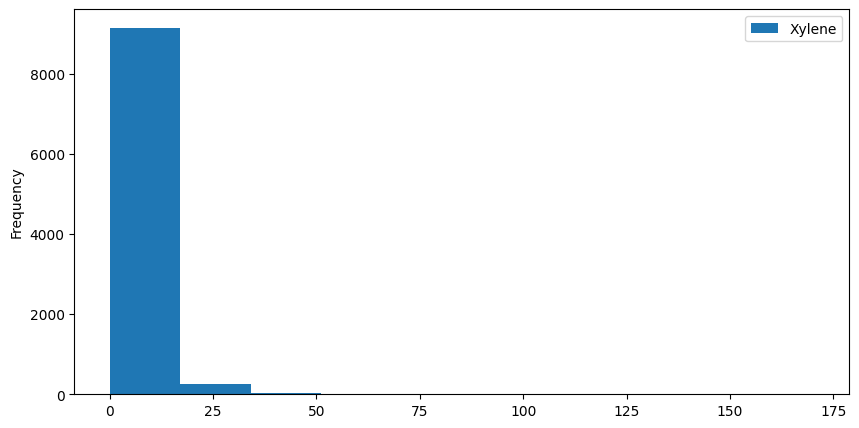

In [16]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

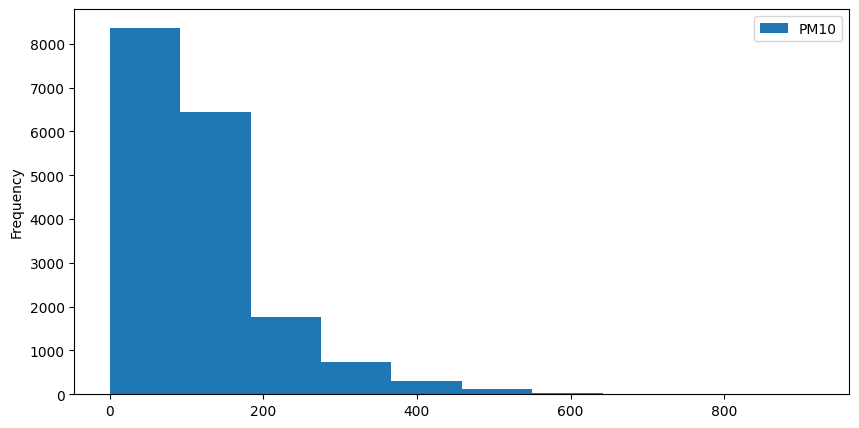

In [17]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

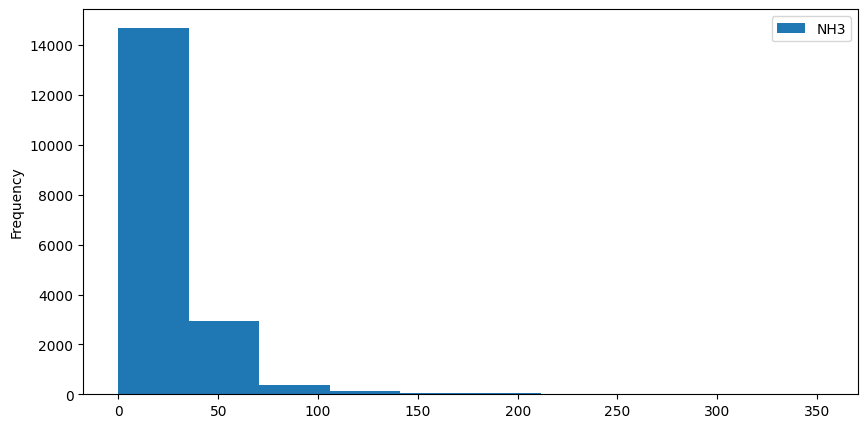

In [18]:

df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

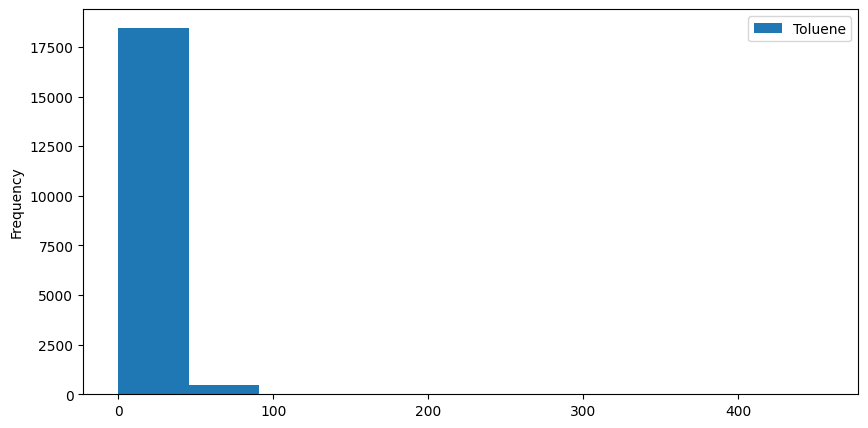

In [19]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

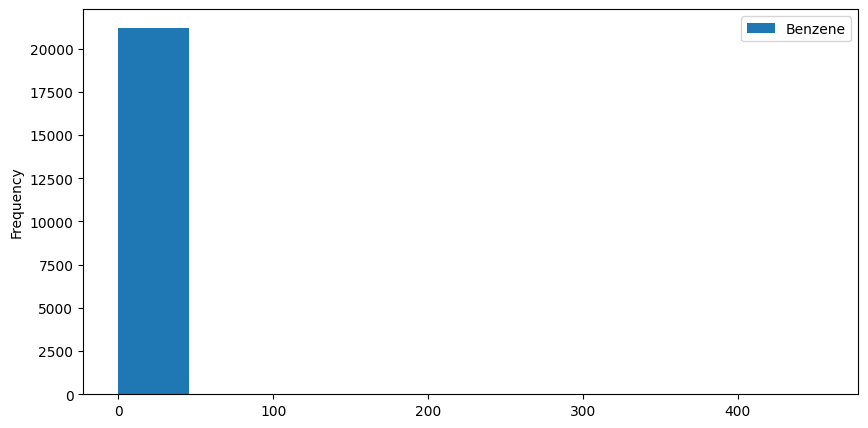

In [20]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

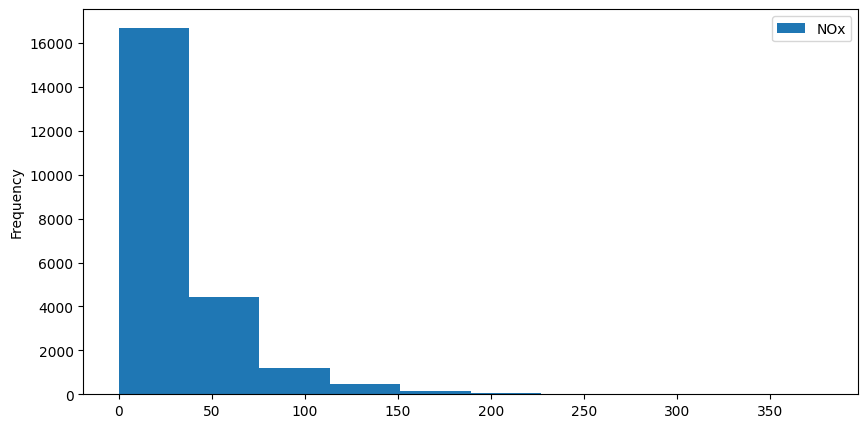

In [21]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

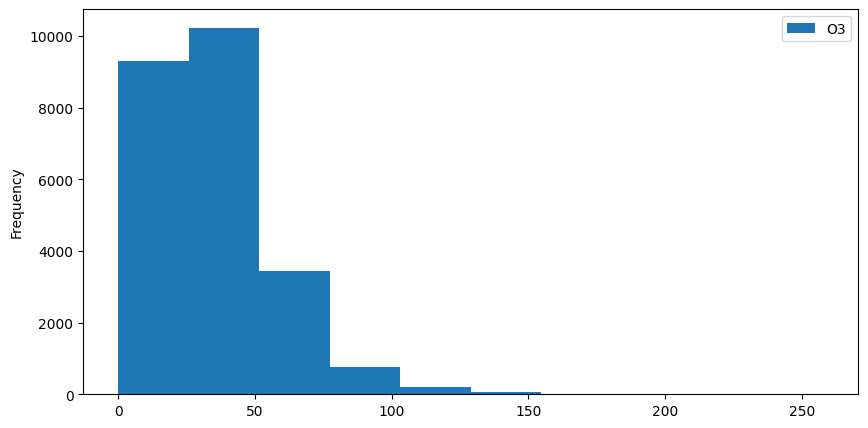

In [22]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

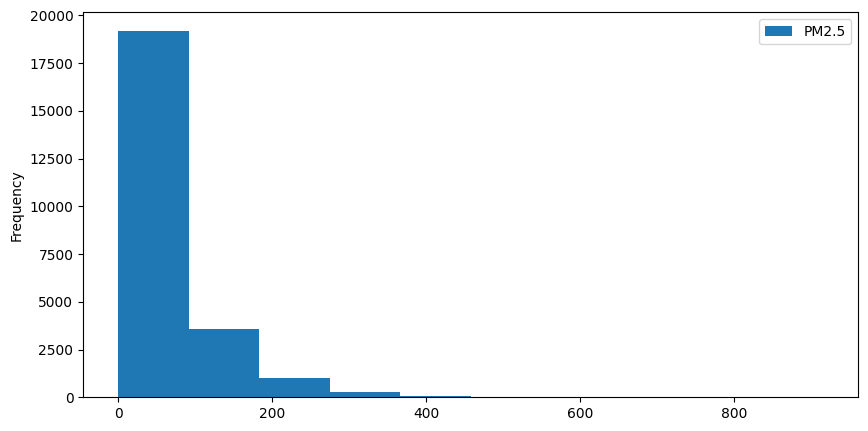

In [23]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

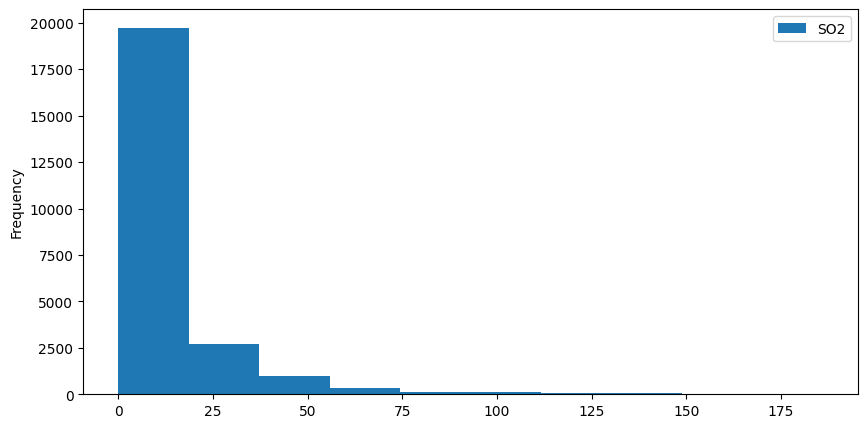

In [24]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

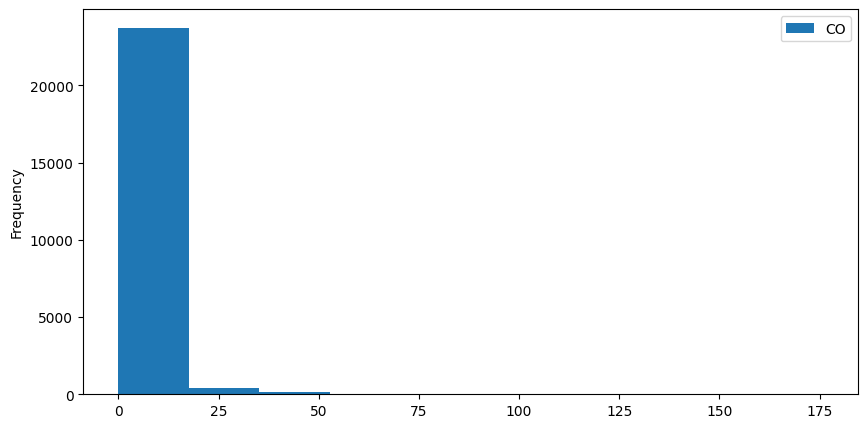

In [25]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

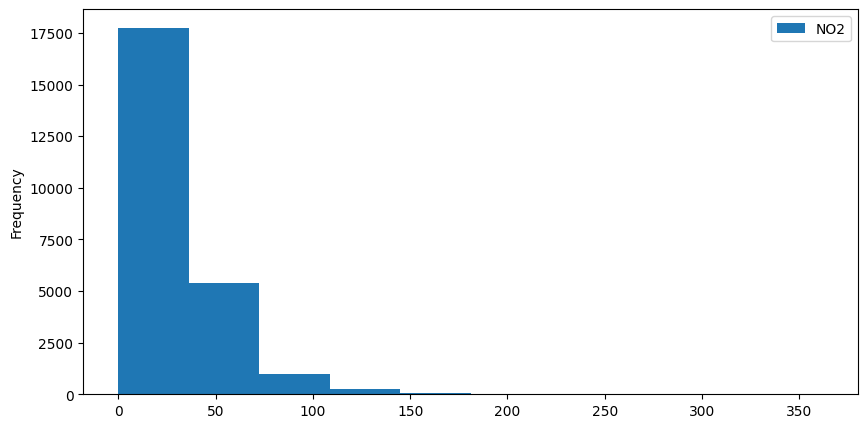

In [26]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

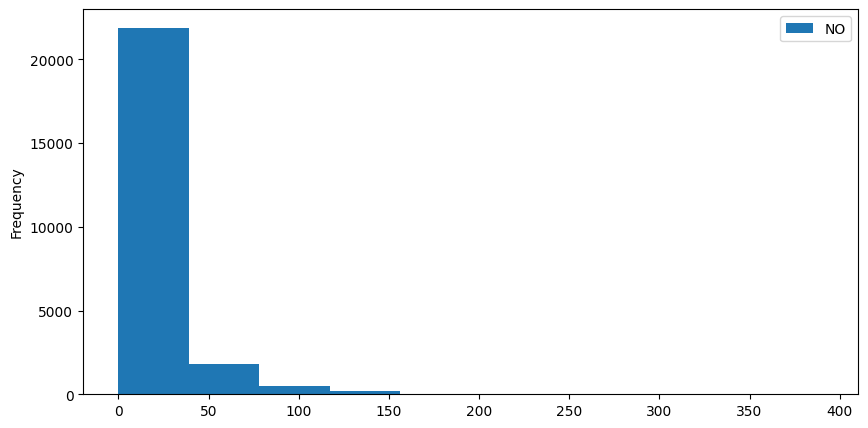

In [27]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

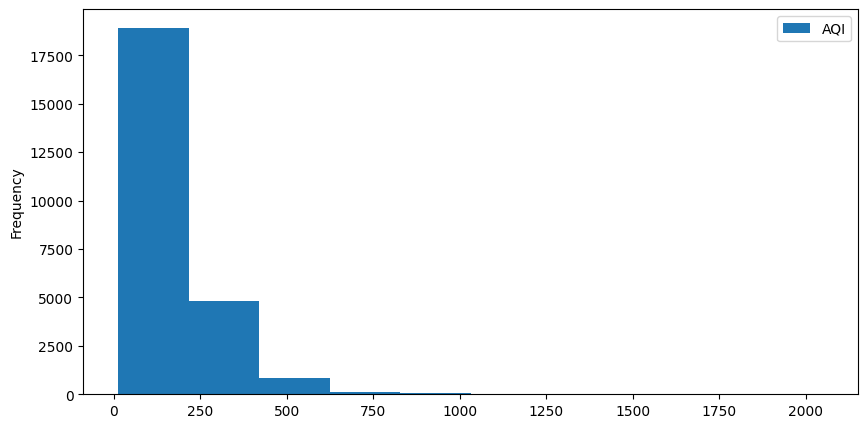

In [28]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

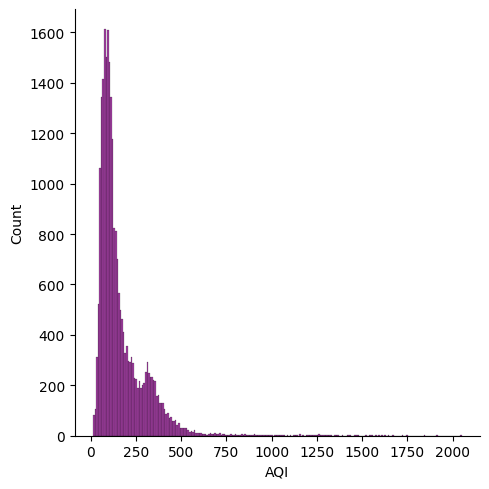

In [29]:
# distribution of aqi from 2015-2020
sns.displot(df, x="AQI", color="purple")
plt.show()

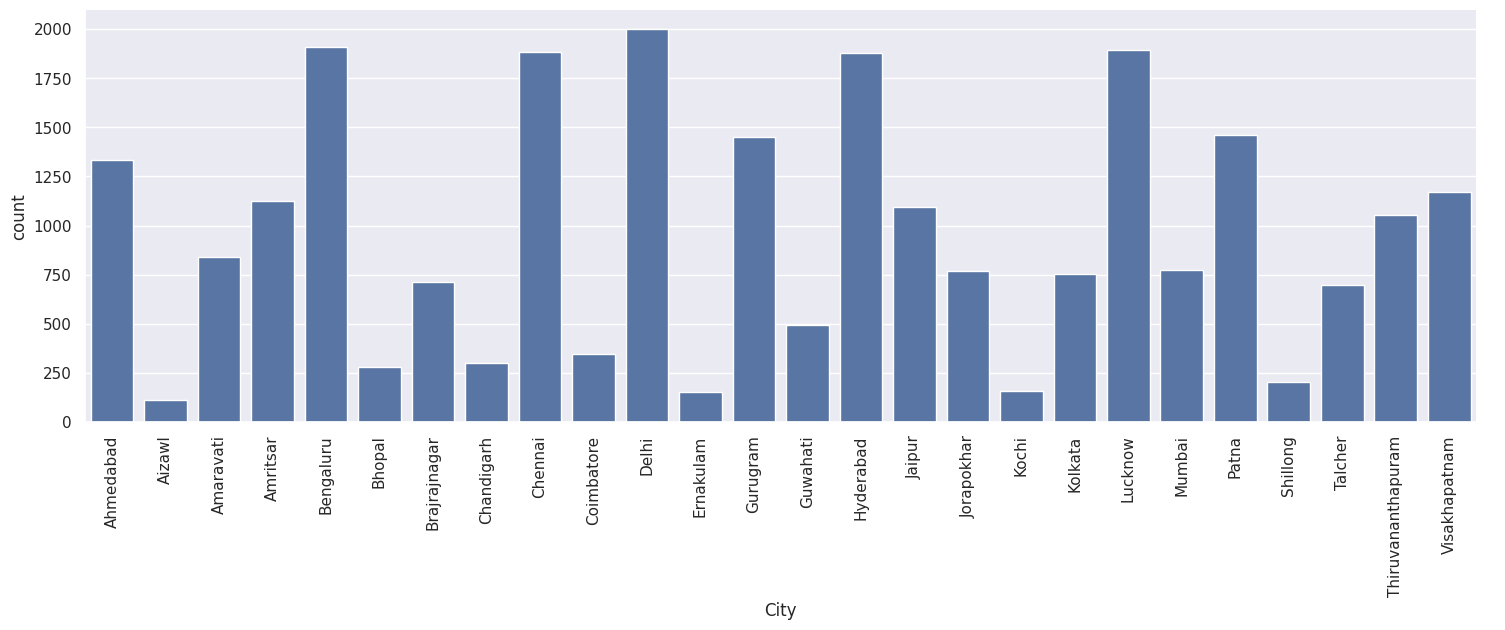

In [30]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

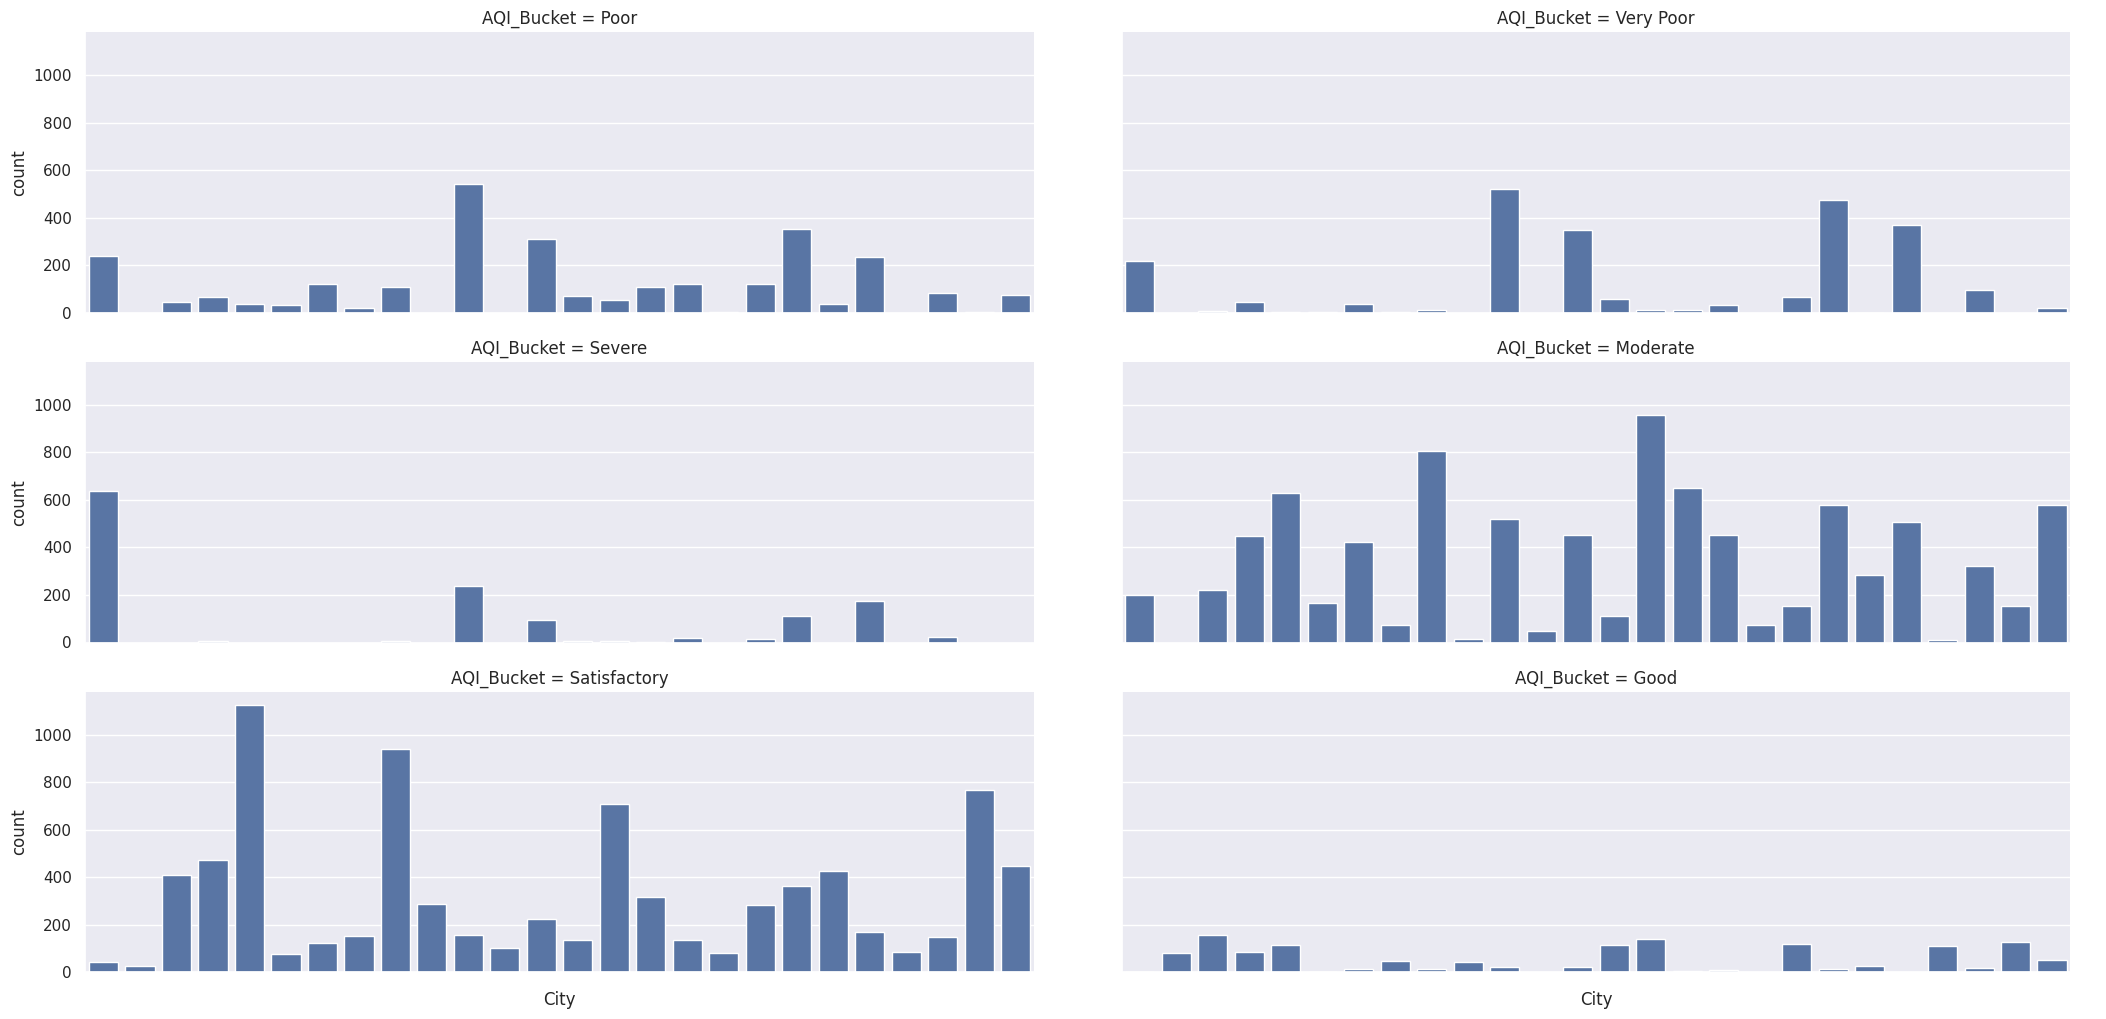

In [31]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

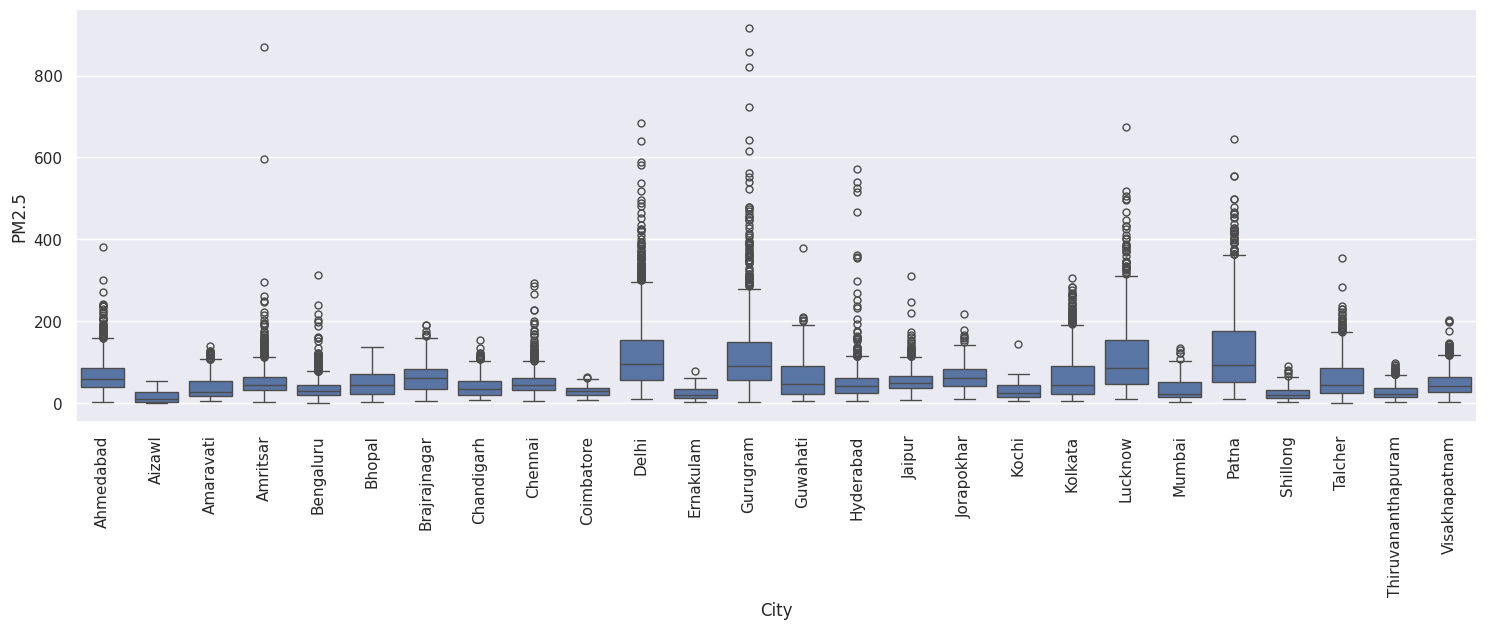

In [32]:
graph1=sns.catplot(x="City",y="PM2.5",kind="box",data=df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

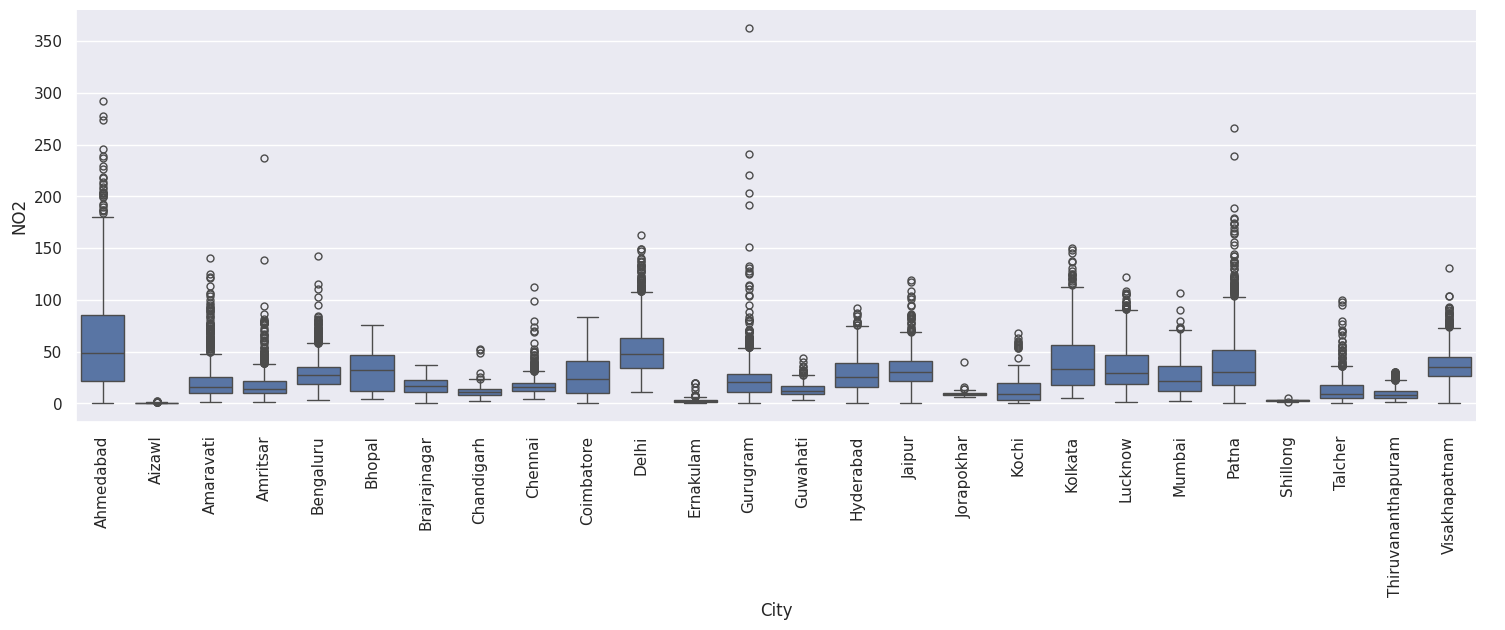

In [33]:
graph2=sns.catplot(x="City",y="NO2",kind="box",data=df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

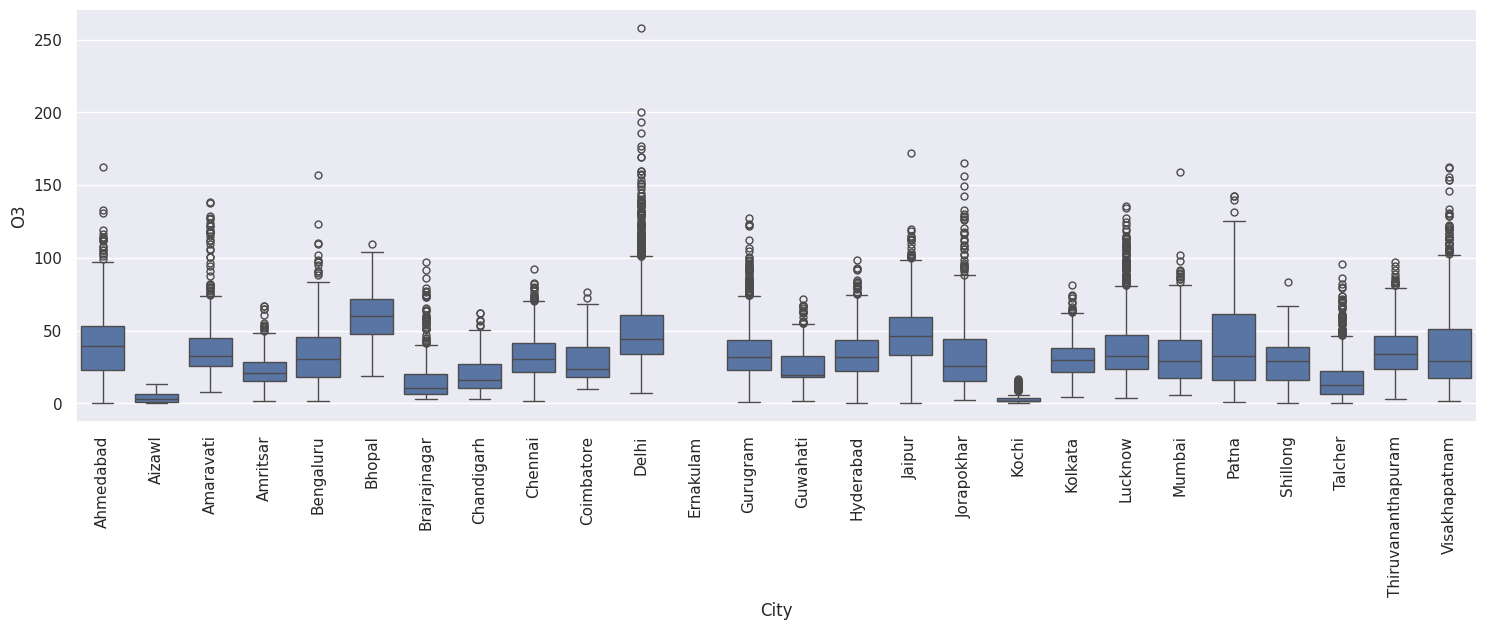

In [34]:
graph3=sns.catplot(x="City",y="O3",data=df,kind="box",height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

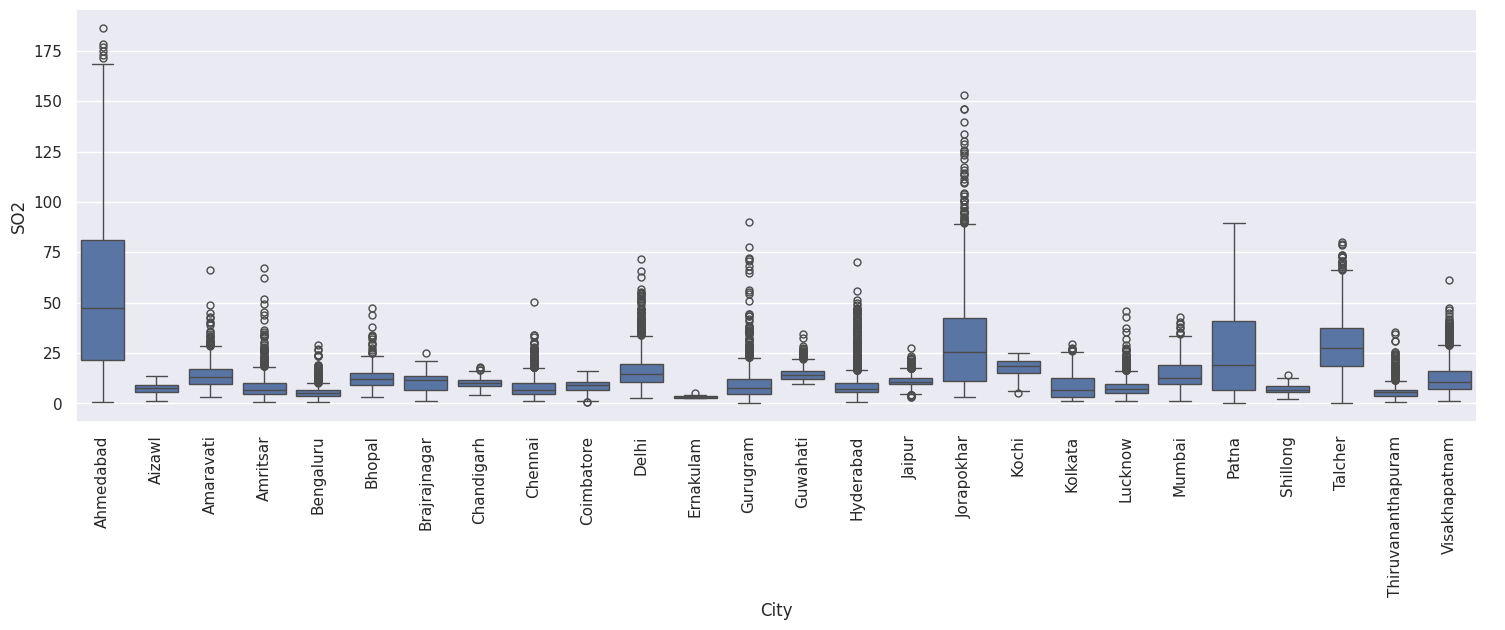

In [35]:
graph4=sns.catplot(x="City",y="SO2",data=df,kind="box",height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

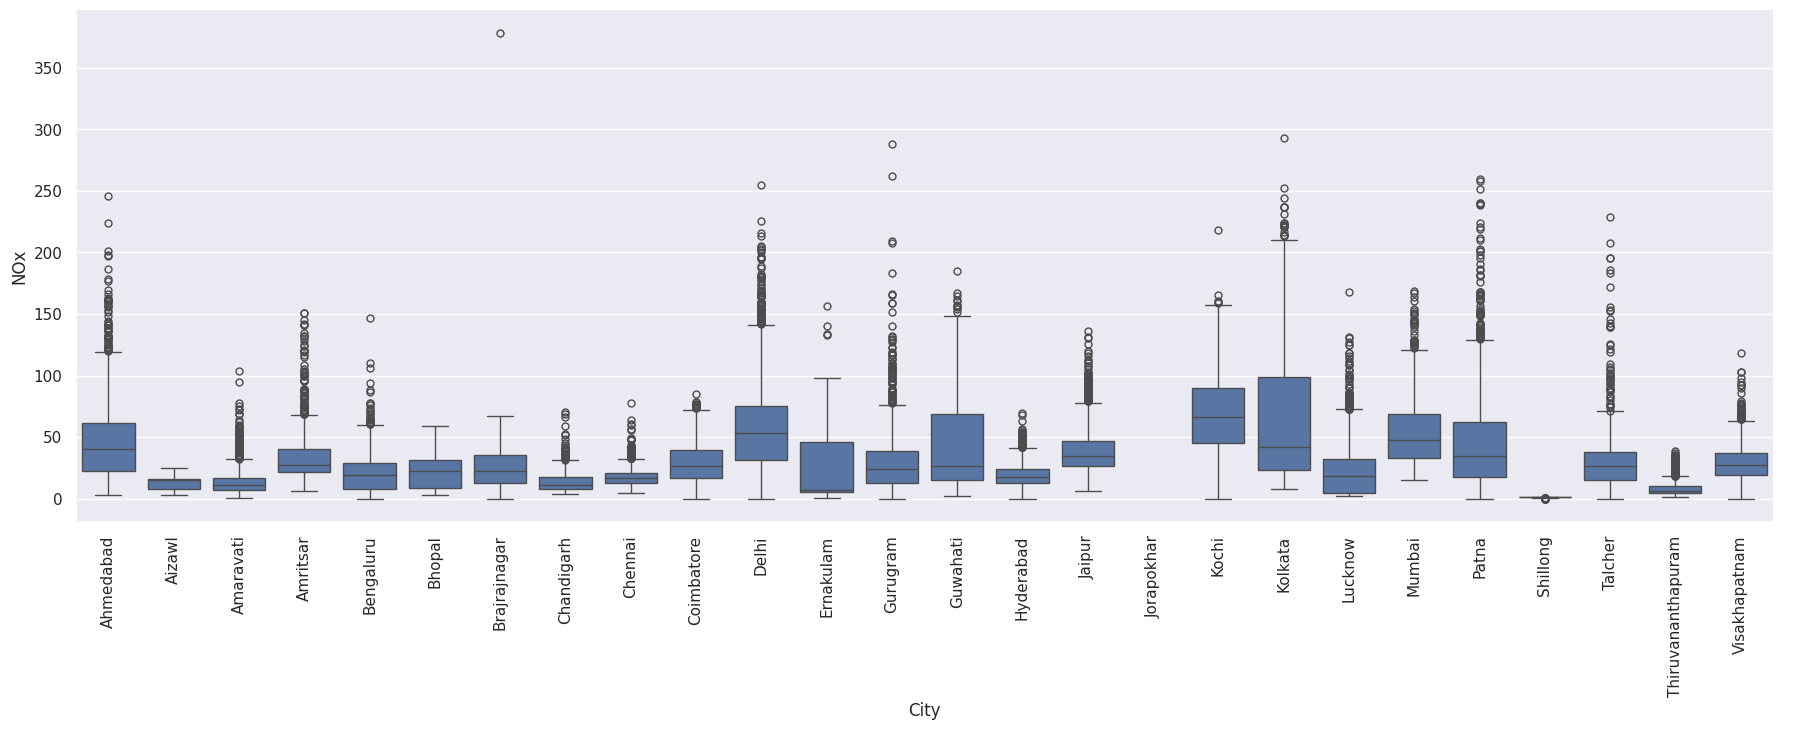

In [36]:
graph5=sns.catplot(data=df,kind="box",x="City",y="NOx",height=6,aspect=3)
graph5.set_xticklabels(rotation=90)

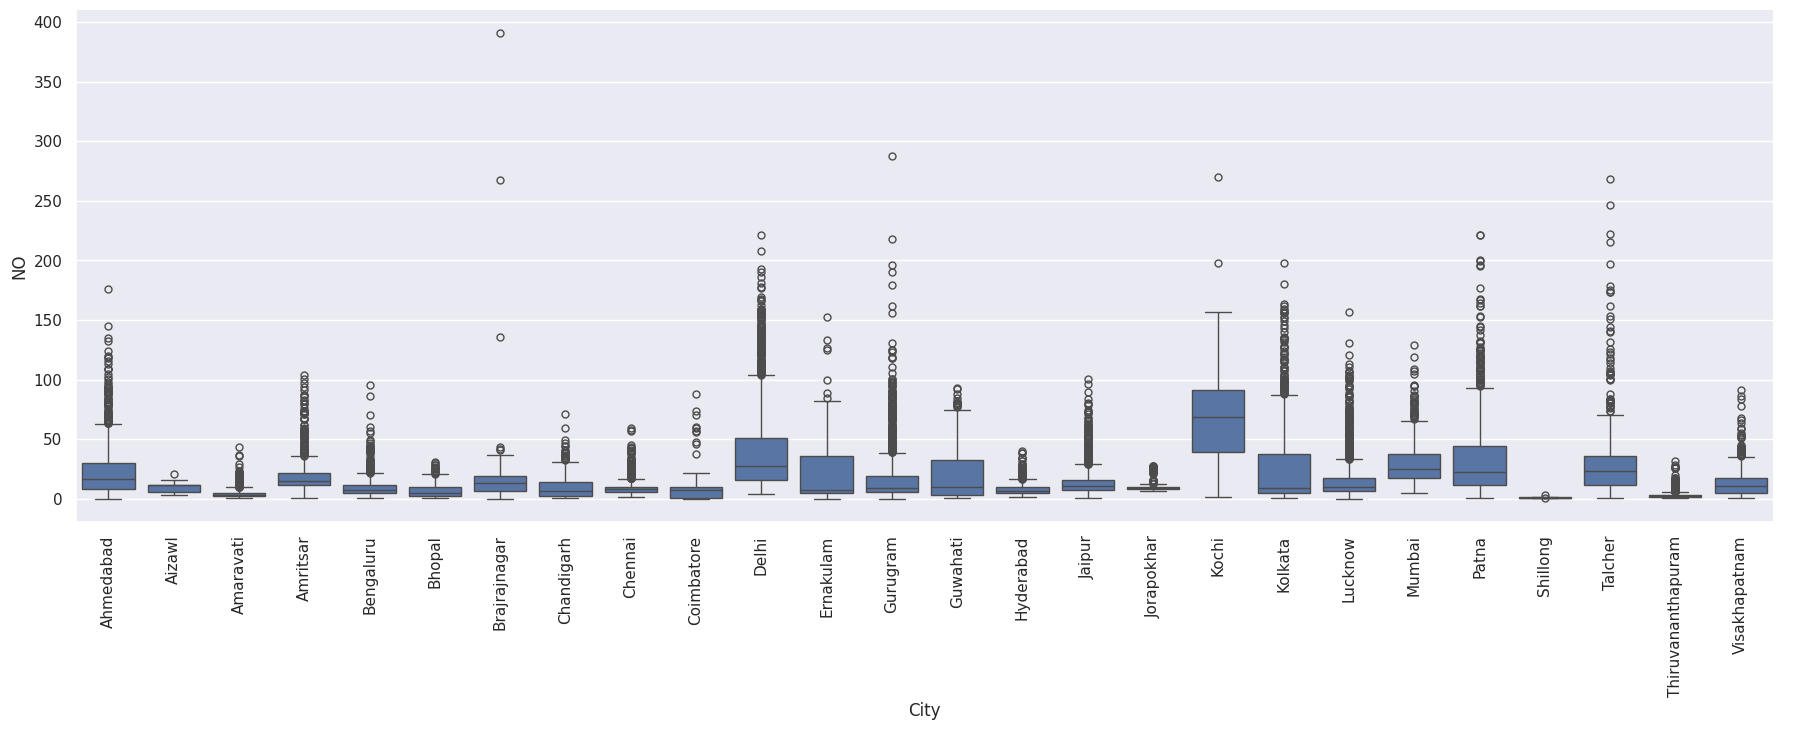

In [37]:
graph6=sns.catplot(data=df,kind="box",x="City",y="NO",height=6,aspect=3)
graph6.set_xticklabels(rotation=90)

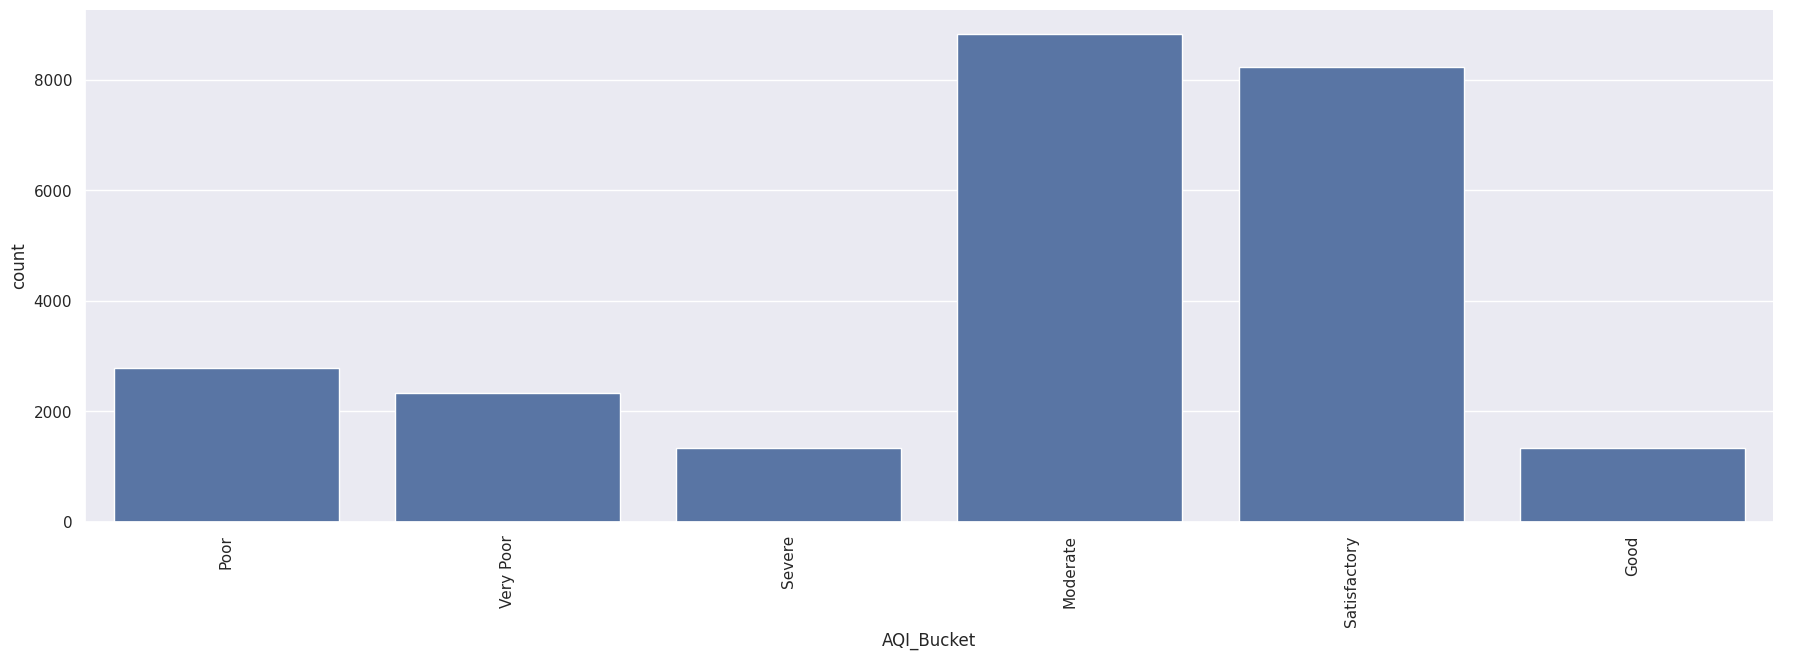

In [38]:
graph7=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)
graph7.set_xticklabels(rotation=90)

In [39]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [40]:
df.describe().loc["mean"]

,mean
PM2.5,67.476613
PM10,118.454435
NO,17.622421
NO2,28.978391
NOx,32.289012
NH3,23.848366
CO,2.345267
SO2,14.362933
O3,34.912885
Benzene,3.458668


In [41]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,678
PM10,7086
NO,387
NO2,391
NOx,1857
NH3,6536
CO,445
SO2,605


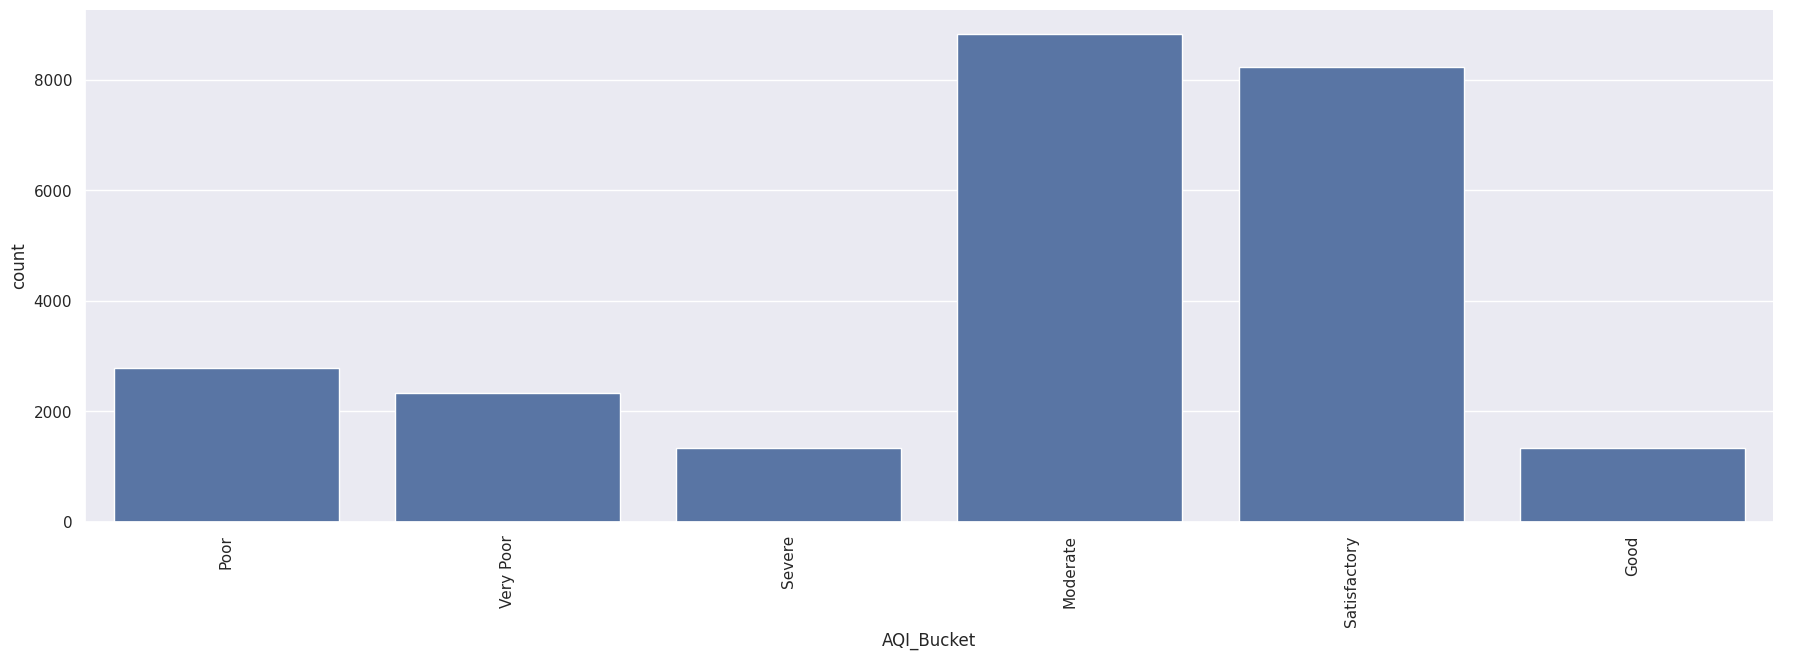

In [42]:
graph=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)
graph.set_xticklabels(rotation=90)

In [43]:
df = df.drop(["AQI_Bucket"], axis=1)

In [44]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

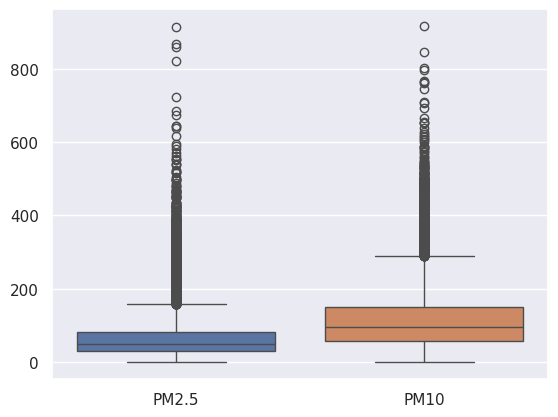

In [45]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

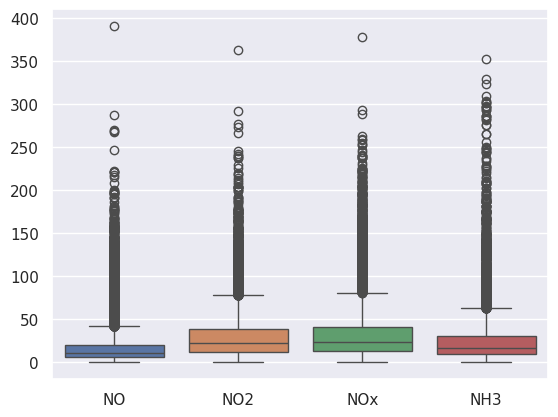

In [46]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

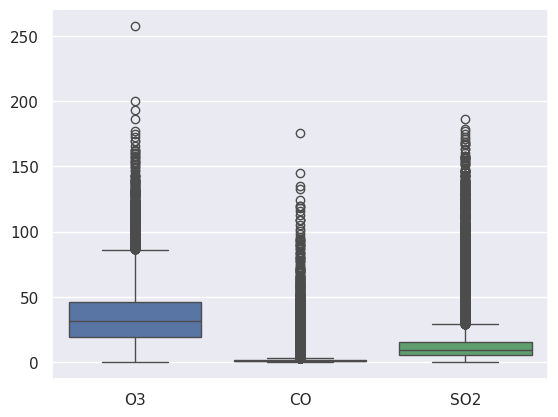

In [47]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

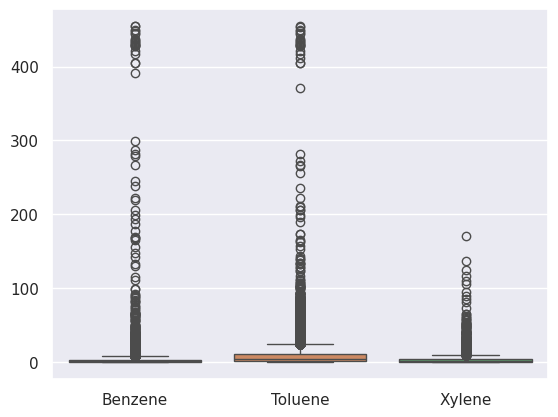

In [48]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

In [49]:
def replace_outliers_with_quartiles(df):

    for column in df.select_dtypes(include=['number']).columns: # Used to cycle through all numeric columns in the DataFrame.
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # To identify outliers, lower and upper limits are calculated and values ​​outside these limits are considered outliers.
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # For each column, we identify outliers and replace them with Q1 or Q3. We do this using a lambda function.
        #If the value is less than the lower bound, it is replaced with Q1. If it is greater than the upper bound,
        #it is replaced with Q3. In the last case, the value is not changed and remains the same.
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )

    return df

df = replace_outliers_with_quartiles(df)

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,55.260713,32.910786,0.04,29.0000,48.785,80.921250,158.80
PM10,17764.0,105.338640,60.235533,0.03,56.7775,96.180,150.180625,289.95
NO,24463.0,12.517884,8.955014,0.03,5.6600,9.910,20.030000,41.58
NO2,24459.0,25.972275,17.006150,0.01,11.9400,22.100,38.240000,77.68
NOx,22993.0,26.756914,17.712288,0.00,13.1100,23.680,40.170000,80.72
NH3,18314.0,20.013266,13.893247,0.01,8.9600,16.310,30.360000,62.45
CO,24405.0,1.004899,0.576547,0.00,0.5900,0.930,1.480000,2.81
SO2,24245.0,10.300662,5.819469,0.01,5.7300,9.220,15.140000,29.22
O3,24043.0,33.274368,18.033165,0.01,19.2500,31.250,46.080000,86.29
Benzene,21315.0,1.859195,1.862739,0.00,0.2300,1.290,3.340000,8.00


<Axes: >

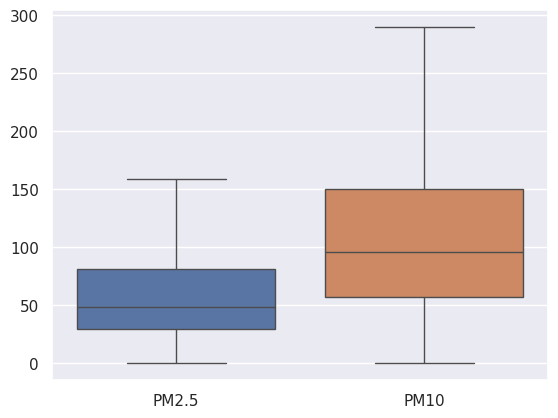

In [51]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

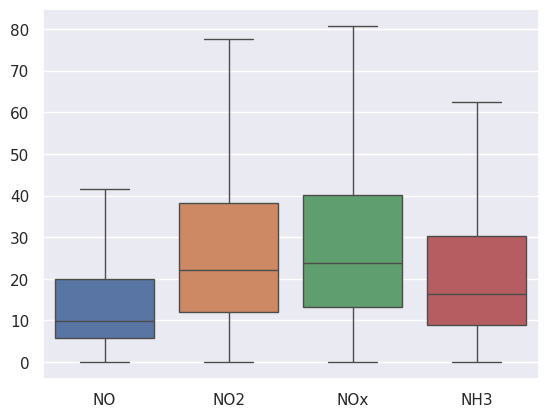

In [52]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

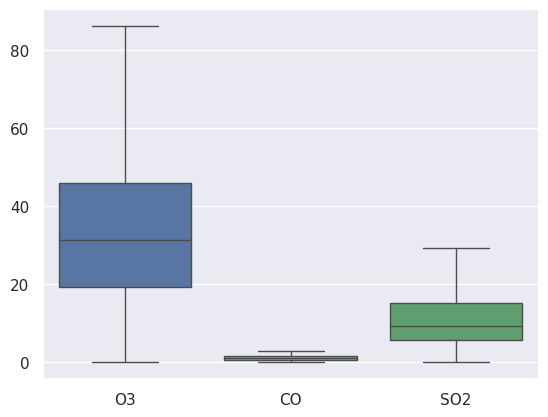

In [53]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

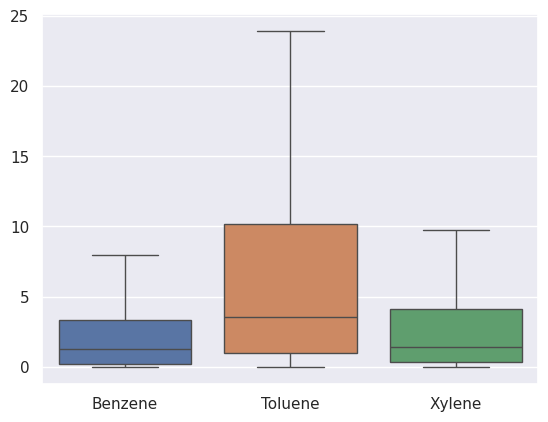

In [54]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

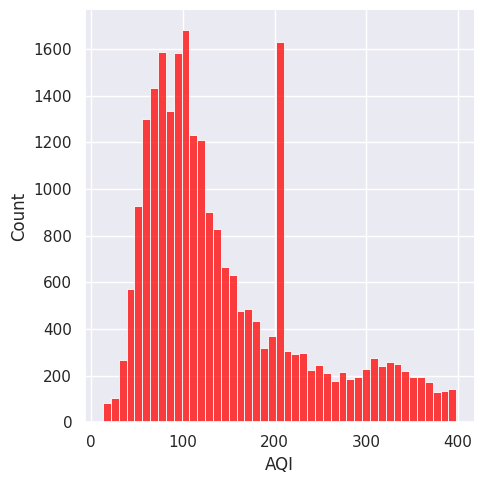

In [55]:
sns.displot(df, x="AQI", color="red")
plt.show()

In [56]:
df1=df.drop(columns=['City'])

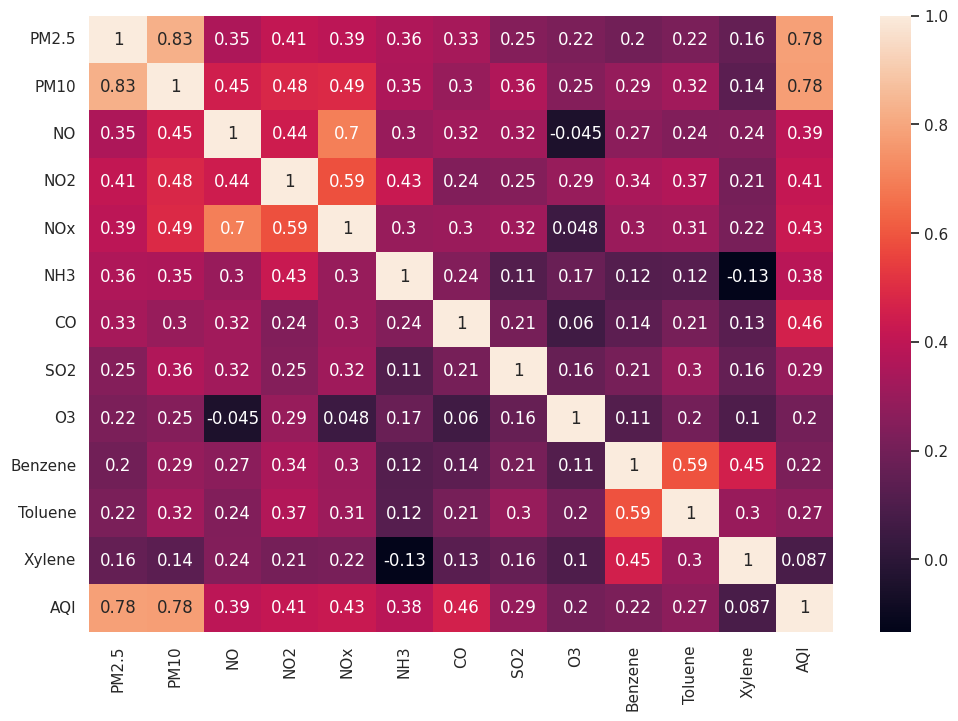

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(numeric_only=True),annot=True)
plt.show()

In [58]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.130,NaN,6.93,28.71,33.72,NaN,1.48,15.14,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.840,NaN,13.85,28.68,41.08,NaN,1.48,15.14,46.08,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.520,NaN,24.39,32.66,52.61,NaN,1.48,15.14,46.08,0.24,0.01,7.67,208.0
31,Ahmedabad,2015-02-01,135.990,NaN,20.03,42.08,40.17,NaN,1.48,15.14,46.08,0.40,0.04,4.12,208.0
32,Ahmedabad,2015-02-02,80.925,NaN,20.03,35.31,72.80,NaN,1.48,15.14,46.08,0.46,0.06,4.12,208.0


In [59]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.130,NaN,6.93,28.71,33.72,NaN,1.48,15.14,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.840,NaN,13.85,28.68,41.08,NaN,1.48,15.14,46.08,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.520,NaN,24.39,32.66,52.61,NaN,1.48,15.14,46.08,0.24,0.01,7.67,208.0
31,Ahmedabad,2015-02-01,135.990,NaN,20.03,42.08,40.17,NaN,1.48,15.14,46.08,0.40,0.04,4.12,208.0
32,Ahmedabad,2015-02-02,80.925,NaN,20.03,35.31,72.80,NaN,1.48,15.14,46.08,0.46,0.06,4.12,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,2020-06-28,24.380,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,2020-06-29,22.910,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,2020-06-30,16.640,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [60]:
df.drop(['Date'],axis=1,inplace=True)        # no need of this feature
df.drop(['City'],axis=1,inplace=True)

In [61]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.130,NaN,6.93,28.71,33.72,NaN,1.48,15.14,59.76,0.02,0.00,3.14,209.0
29,79.840,NaN,13.85,28.68,41.08,NaN,1.48,15.14,46.08,0.04,0.00,4.81,328.0
30,94.520,NaN,24.39,32.66,52.61,NaN,1.48,15.14,46.08,0.24,0.01,7.67,208.0
31,135.990,NaN,20.03,42.08,40.17,NaN,1.48,15.14,46.08,0.40,0.04,4.12,208.0
32,80.925,NaN,20.03,35.31,72.80,NaN,1.48,15.14,46.08,0.46,0.06,4.12,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.020,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.380,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.910,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,16.640,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [62]:
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)

In [63]:
df1

array([[ 0.8468307 ,         nan, -0.62400781, ..., -1.00898364,
         0.38497998,  0.70999757],
       [ 0.7468614 ,         nan,  0.14875947, ..., -1.00898364,
         1.11519577,  2.07124258],
       [ 1.192925  ,         nan,  1.32577784, ..., -1.00714765,
         2.36574497,  0.69855854],
       ...,
       [-0.9830024 , -0.65758122, -1.01262488, ..., -1.00714765,
        -0.98800061, -0.90290618],
       [-1.17352139, -0.91922817, -0.94562194, ..., -1.00898364,
        -0.98800061, -1.06305265],
       [-1.22335411, -0.65309869, -1.35322318, ...,         nan,
                nan, -1.10880878]])

In [64]:
df = pd.DataFrame(df1,columns = df.columns)

In [65]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.846831,NaN,-0.624008,0.160988,0.393130,NaN,0.824062,0.831594,1.468748,-0.987384,-1.008984,0.384980,0.709998
1,0.746861,NaN,0.148759,0.159224,0.808670,NaN,0.824062,0.831594,0.710130,-0.976647,-1.008984,1.115196,2.071243
2,1.192925,NaN,1.325778,0.393261,1.459645,NaN,0.824062,0.831594,0.710130,-0.869275,-1.007148,2.365745,0.698559
3,2.453024,NaN,0.838890,0.947190,0.757292,NaN,0.824062,0.831594,0.710130,-0.783378,-1.001640,0.813490,0.698559
4,0.779830,NaN,0.838890,0.549091,2.599556,NaN,0.824062,0.831594,0.710130,-0.751167,-0.997968,0.813490,0.698559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,-1.222746,-0.903124,-0.540254,-0.053645,-0.407461,-0.542960,-0.927783,-0.300835,-0.553124,0.204438,1.207062,-0.668804,-1.211760
24846,-0.938335,-0.518789,-1.015975,0.005159,-0.577403,-0.577510,-0.841058,0.415740,-0.173815,-0.600847,-0.603229,-0.821844,-0.880028
24847,-0.983002,-0.657581,-1.012625,0.209207,-0.475777,-0.669643,-0.910438,-0.323174,-0.128342,-0.992752,-1.007148,-0.988001,-0.902906
24848,-1.173521,-0.919228,-0.945622,0.193330,-0.449241,-0.718589,-0.841058,-0.079160,-0.275851,-0.998121,-1.008984,-0.988001,-1.063053


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [67]:
x=df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df["AQI"]

In [68]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.846831,NaN,-0.624008,0.160988,0.393130,NaN,0.824062,0.831594,1.468748,-0.987384,-1.008984,0.384980
1,0.746861,NaN,0.148759,0.159224,0.808670,NaN,0.824062,0.831594,0.710130,-0.976647,-1.008984,1.115196
2,1.192925,NaN,1.325778,0.393261,1.459645,NaN,0.824062,0.831594,0.710130,-0.869275,-1.007148,2.365745
3,2.453024,NaN,0.838890,0.947190,0.757292,NaN,0.824062,0.831594,0.710130,-0.783378,-1.001640,0.813490
4,0.779830,NaN,0.838890,0.549091,2.599556,NaN,0.824062,0.831594,0.710130,-0.751167,-0.997968,0.813490


In [69]:
y.head()

,AQI
0,0.709998
1,2.071243
2,0.698559
3,0.698559
4,0.698559


In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(19880, 12) (4970, 12) (19880,) (4970,)


In [76]:
X_train.dropna(inplace=True)
Y_train = Y_train[X_train.index]  # Align Y_train with the dropped rows in X_train

# Now fit the model
model.fit(X_train, Y_train)

LinearRegression()

In [78]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'
X_test_imputed = imputer.fit_transform(X_test)

# Convert the imputed array back to a DataFrame (if needed)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

# Now predict using the imputed X_test
test_pred = model.predict(X_test)

In [79]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.40378393711123545
RMSE TestData =  0.5851827563188063
--------------------------------------------------
RSquared value on train: 0.8072818871213476
RSquared value on test: 0.6538985748783839


In [80]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [81]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [82]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.40378393711123545
RMSE TestData =  0.5851827563188063
--------------------------------------------------
RSquared value on train: 0.8072818871213476
RSquared value on test: 0.6538985748783839


In [83]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [84]:
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [85]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  1.5537433232974876e-18
RMSE TestData =  0.6115625163067954
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.6219910653482452


In [86]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [87]:
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [89]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.11614425865305776
RMSE TestData =  0.5231093135530508
--------------------------------------------------
RSquared value on train: 0.9840551679110017
RSquared value on test: 0.7234298839770473
